## KNN Sklearn Implementation

In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
df=pd.read_csv('multiclass.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_MWF_Intro_to_ML/Supervised_Algorithms/02_KNN_2/multiclass.csv
100%|██████████████████████████████████████| 14.6k/14.6k [00:00<00:00, 14.4MB/s]


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [3]:
X=df[['Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].copy()
y=df[['class']].copy()

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [5]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [6]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [7]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [9]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(X_sm, y_sm)


KNeighborsClassifier(metric='euclidean')

In [10]:
knn.score(X_val_scaled, y_val)

0.891566265060241

In [11]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_val_scaled)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.93      0.76        14
           2       1.00      0.87      0.93        38
           3       0.93      0.90      0.92        31

    accuracy                           0.89        83
   macro avg       0.86      0.90      0.87        83
weighted avg       0.92      0.89      0.90        83



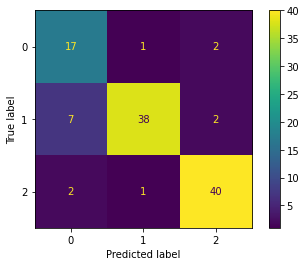

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

## Hyperparameter Tuning in KNN

In [13]:
Acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)

    Acc.append(knn.score(X_val_scaled,y_val))

Text(0, 0.5, 'Accuracy')

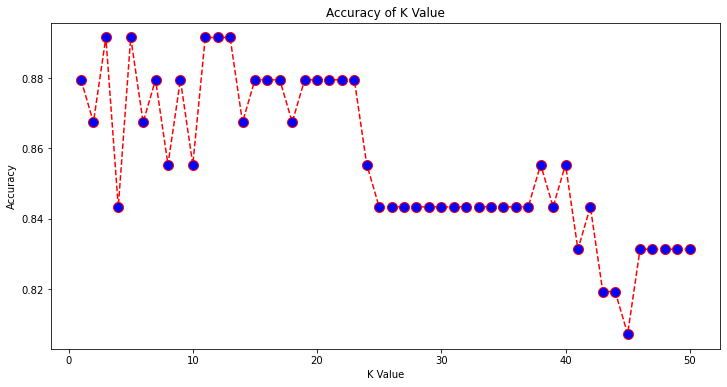

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

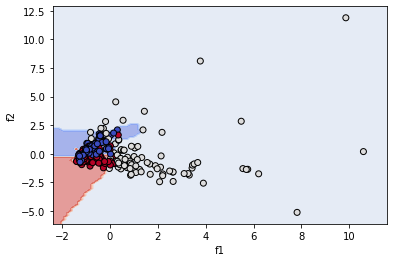

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Choosing the first 2 columns for the plot


pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)

# Creating and fitting the tree classifier

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(X_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

## KNN Based Imputation

In [16]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS


Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_MWF_Intro_to_ML/Supervised_Algorithms/02_KNN_2/knn_imputation.csv
100%|██████████████████████████████████████| 12.9k/12.9k [00:00<00:00, 11.8MB/s]


In [17]:
import pandas as pd
import numpy as np

df_imp = pd.read_csv('knn_imputation.csv')
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)

In [18]:
df_imp.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [19]:
df_imp.isna().sum()

Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=5))  # Step 2: KNNImputer for missing value imputation
])

# Fit and transform the data using the pipeline
X_transformed = pipeline.fit_transform(df_imp)

# Creating dataframe
X_transformed = pd.DataFrame(X_transformed,columns=df_imp.columns)

In [21]:
X_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.200717,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [22]:
X_transformed.isna().sum()


Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64